In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

import basketball
import pickle

import statsmodels.formula.api as smf
import statsmodels.api as sm

In [2]:
with open('final_df.pickle', 'rb') as f:
    df = pickle.load(f)
    
df = pd.DataFrame(df)

In [4]:
# CORRELATIONS WITH SALARY
df.corr().sort_values('Salary', ascending=False)['Salary']

0
Salary    1.000000
MP        0.551441
GS        0.539360
G         0.336975
DRB       0.317692
2P        0.303083
PTS       0.293230
FG        0.279271
BLK       0.252291
FT        0.238259
2PA       0.234655
Age       0.232740
TRB       0.199607
FG%       0.193449
FGA       0.177487
FTA       0.176386
2P%       0.154791
AST       0.070152
FT%       0.067614
ORB       0.013816
STL      -0.015815
TOV      -0.042273
3P       -0.088587
3P%      -0.116598
3PA      -0.117355
PF       -0.176819
Rk       -0.493571
Name: Salary, dtype: float64

In [5]:
mapper = {'2P':'TwoPoint',
          '2PA':'TwoPointAttempt',
          '2P%':'TwoPointPercent',
          'FG%': 'FieldGoalPercent',
          'FT%':'FreeThrowPercent',
          '3P%': 'ThreePointPercent'
         }

df.rename(columns=mapper, inplace=True)

preliminary_columns = ['DRB', 'TwoPoint', 'PTS', 'FG', 'BLK', 'FT',
                       'TwoPointAttempt', 'Age', 'PF', 'Salary']

In [7]:
# let's drop players with low minutes played per game, say less than 10
df['MPperG'] = df['MP']/df['G']

mask = (df['MPperG'] > 10)
df_over_10 = df[mask]

In [8]:
# naive fit

results = smf.ols(
    'Salary ~ DRB + TwoPoint + PTS + FG + BLK + FT + Age + PF + TwoPointAttempt', 
    data=df_over_10).fit()

results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Salary   R-squared:                       0.441
Model:                            OLS   Adj. R-squared:                  0.424
Method:                 Least Squares   F-statistic:                     27.13
Date:                Thu, 17 Jan 2019   Prob (F-statistic):           1.91e-34
Time:                        20:03:42   Log-Likelihood:                -5125.1
No. Observations:                 320   AIC:                         1.027e+04
Df Residuals:                     310   BIC:                         1.031e+04
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept       -5.809e+06   1.28e+06     -4.550      0.000   -8.32e+06    -3.3e+06
DRB              2.782e+05      1e+05      2.774      0.006    8.09e+04    4.76e+05
TwoPoint         1.024e+06   1.37e+06      0.749      0.454   -1.66e+06    3.71e+06
PTS              8.043e+05   1.31e+06      0.612      0.541   -1.78e+06    3.39e+06
FG              -2.051e+06   3.94e+06     -0.521      0.603   -9.81e+06     5.7e+06
BLK              1.163e+06   2.12e+05      5.498      0.000    7.47e+05    1.58e+06
FT              -6.211e+05   1.32e+06     -0.471      0.638   -3.22e+06    1.98e+06
Age              1.954e+05   3.12e+04      6.270      0.000    1.34e+05    2.57e+05
PF              -6.427e+05   1.23e+05     -5.208      0.000   -8.85e+05      -4e+05
TwoPointAttempt  4.335e+04   1.18e+05      0.367      0.714   -1.89e+05    2.76e+05
==============================================================================
Omnibus:                       60.482   Durbin-Watson:                   1.852
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              121.042
Skew:                           0.988   Prob(JB):                     5.20e-27
Kurtosis:                       5.274   Cond. No.                     1.23e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.23e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [8]:
results = smf.ols(
    'Salary ~ DRB + PTS + BLK + Age + PF', 
    data=df_over_10).fit()

results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Salary   R-squared:                       0.425
Model:                            OLS   Adj. R-squared:                  0.416
Method:                 Least Squares   F-statistic:                     46.40
Date:                Fri, 18 Jan 2019   Prob (F-statistic):           8.02e-36
Time:                        10:03:32   Log-Likelihood:                -5129.5
No. Observations:                 320   AIC:                         1.027e+04
Df Residuals:                     314   BIC:                         1.029e+04
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -6.121e+06   1.24e+06     -4.945      0.000   -8.56e+06   -3.69e+06
DRB         3.821e+05   9.18e+04      4.163      0.000    2.01e+05    5.63e+05
PTS         2.726e+05   3.65e+04      7.468      0.000    2.01e+05    3.44e+05
BLK         1.201e+06   2.11e+05      5.696      0.000    7.86e+05    1.62e+06
Age         1.829e+05   3.09e+04      5.922      0.000    1.22e+05    2.44e+05
PF         -5.825e+05   1.22e+05     -4.755      0.000   -8.23e+05   -3.41e+05
==============================================================================
Omnibus:                       64.808   Durbin-Watson:                   1.898
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              134.258
Skew:                           1.039   Prob(JB):                     7.02e-30
Kurtosis:                       5.398   Cond. No.                         311.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## next steps:

- Try out some polynomial terms, especially for PTS. 
- See if something such as a log tranform or box

In [51]:
# need to drop:
# FreeThrowPercent, ThreePointPercent, FieldGoalPercent

to_remove = ['Salary', 'FreeThrowPercent', 'ThreePointPercent',
             'TwoPointPercent', 'FieldGoalPercent']

columns = list(df.columns)
for column in to_remove:
    columns.remove(column)
    
print(columns)

['Rk', 'Age', 'G', 'GS', 'MP', 'FG', 'FGA', '3P', '3PA', 'TwoPoint', 'TwoPointAttempt', 'FT', 'FTA', 'ORB', 'DRB', 'TRB', 'AST', 'STL', 'BLK', 'TOV', 'PF', 'PTS', 'MPperG']


## Train, test split

Steps:
- train test split
- cross validation w/ Grid search
    - linear regression, lasso, ridge, elastic net
    - try different params
    - try polynomial features
- analysis

**OLS Regression**

In [183]:
from sklearn.model_selection import train_test_split, cross_validate
from sklearn.pipeline import Pipeline
from sklearn.linear_model import Lasso, Ridge, LinearRegression
from sklearn.preprocessing import StandardScaler

X = df[columns].values
y = df['Salary'].values



0.3698090965277373

In [192]:
# let's attempt a log transform on y

y = np.log(y)

In [193]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2,
                                                   random_state = 1999)

lm_pipe = Pipeline([
    ('std_scl', StandardScaler()), 
    ('lm', LinearRegression())])


cv_results = cross_validate(lm_pipe, X_train, y_train, cv=5)
cv_results['test_score'].mean()

0.5008760370820076

Linear reg best score = 0.3698

In [214]:
from sklearn.model_selection import GridSearchCV
    
parameters = {'lass__alpha': [.00155, .0016, .00165, .0025]}

lass_pipe = Pipeline([
    ('std_scl', StandardScaler()),
    ('lass', Lasso(max_iter=100000))
])

gcv = GridSearchCV(lass_pipe, parameters, cv=5, verbose=0)
gcv.fit(X_train, y_train)

print(gcv.best_score_, '\n', gcv.best_params_)

0.5144169329676337 
 {'lass__alpha': 0.00165}


In [219]:
parameters = {'ridge__alpha': [1, 4, 5,6, 15]}

ridge_pipe = Pipeline([
    ('std_scl', StandardScaler()),
    ('ridge', Ridge())
])

gcv = GridSearchCV(ridge_pipe, parameters, cv=5, verbose=1)
gcv.fit(X_train, y_train)

print(gcv.best_score_, '\n', gcv.best_params_)

Fitting 5 folds for each of 5 candidates, totalling 25 fits
0.5164978271029023 
 {'ridge__alpha': 5}


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  25 out of  25 | elapsed:    0.1s finished


In [220]:
from sklearn.linear_model import ElasticNet

parameters = {'enet__alpha': [0.0001, 0.001, 0.01, 0.03, 0.06, 0.1, 0.15],
             'enet__l1_ratio': [0.01, .05, .1, .2, .3, .4, .5, .6, .7, .8, .9]}

enet_pipe = Pipeline([
    ('std_scl', StandardScaler()),
    ('enet', ElasticNet(max_iter=100000))
])

gcv = GridSearchCV(enet_pipe, parameters, cv=5, verbose=1)
gcv.fit(X_train, y_train)

print(gcv.best_score_, '\n', gcv.best_params_)

Fitting 5 folds for each of 77 candidates, totalling 385 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


0.5160718703034112 
 {'enet__alpha': 0.01, 'enet__l1_ratio': 0.05}


[Parallel(n_jobs=1)]: Done 385 out of 385 | elapsed:    7.8s finished


In [226]:
from sklearn.ensemble import RandomForestRegressor

parameters = {
    'rf_reg__n_estimators': [50, 100,150, 200],
    'rf_reg__max_depth': [4,5,6, None]
}

rf_reg_pipe = Pipeline([
    ('std_scl', StandardScaler()),
    ('rf_reg', RandomForestRegressor())
])

gcv = GridSearchCV(rf_reg_pipe, parameters, cv=5, verbose=1)
gcv.fit(X_train, y_train)

print(gcv.best_score_, '\n', gcv.best_params_)

Fitting 5 folds for each of 5 candidates, totalling 25 fits
0.5164978271029023 
 {'ridge__alpha': 5}


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  25 out of  25 | elapsed:    0.1s finished


## Let's make some predictions

In [260]:
# lasso was my best linear model

parameters = {'ridge__alpha': [1, 4, 5,6, 15]}

ridge_pipe = Pipeline([
    ('std_scl', StandardScaler()),
    ('ridge', Ridge())
])

gcv = GridSearchCV(ridge_pipe, parameters, cv=5, verbose=1)
gcv.fit(X_train, y_train)

best_est = gcv.best_estimator_
print(gcv.best_params_)

Fitting 5 folds for each of 5 candidates, totalling 25 fits
{'ridge__alpha': 5}


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  25 out of  25 | elapsed:    0.1s finished


In [262]:
from sklearn.metrics import r2_score, mean_squared_error

best_pipe =  Pipeline([
    ('std_scl', StandardScaler()),
    ('ridge', Ridge(alpha=5))
])

best_pipe.fit(X_train, y_train)

y_pred = best_pipe.predict(X_test) # I should probably retrain on the whole training set

print('r2:\t', r2_score(y_test, y_pred))
print('rmse:\t', np.sqrt(mean_squared_error(y_test, y_pred)))

r2:	 0.4980347219420135
rmse:	 0.7396511669414985


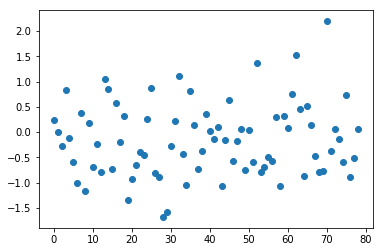

In [263]:
import matplotlib.pyplot as plt

res = y_pred - y_test

plt.scatter([n for n in range(len(res))], res)

With the outliers towards the bottom, maybe polynomial features would work, though the order (in x) is random

In [264]:
# how to get players back?
np.round(np.exp(y_pred), decimals=-4)


array([4490000.,  480000., 1820000., 2310000., 1250000., 3300000.,
        680000., 1240000., 1310000., 2890000., 4930000., 2780000.,
       1360000., 2840000.,  820000.,  330000.,  510000., 1360000.,
       1090000.,  240000., 1650000., 2670000., 4080000., 3360000.,
       3930000.,  840000., 3110000., 1250000.,  780000., 1020000.,
       2610000., 2940000., 1630000., 7290000.,  510000.,  900000.,
        740000., 7230000., 6220000.,  860000., 3520000.,  920000.,
        730000.,  530000.,  850000.,  540000., 2040000.,  580000.,
       1390000., 3990000., 1240000., 2410000., 4510000., 2210000.,
       7440000., 1110000.,  560000., 2370000.,  820000., 1010000.,
       3900000., 2150000., 1340000., 2760000.,  660000.,  960000.,
        330000., 5480000., 1380000., 1680000., 9030000., 5380000.,
        580000.,  640000., 3570000.,  600000., 1130000., 3190000.,
       1870000.])

In [265]:
y_test_real = np.exp(y_test)
y_pred_real = np.exp(y_pred)

np.sqrt(mean_squared_error(y_test_real, y_pred_real))

2296333.6324282163

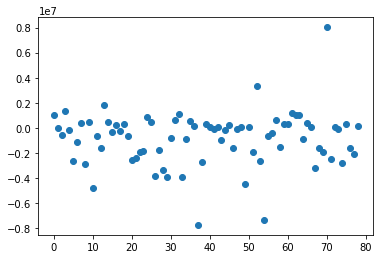

In [266]:
res_real = y_pred_real - y_test_real
res_x = [n for n in range(len(res_real))]

plt.scatter(res_x, res_real)

In [272]:
df_X = df[columns]
df_y = df[['Salary']].copy()

df_y_pred = np.exp(best_est.predict(df_X.values))
df_y['Predicted Salary'] = np.round(df_y_pred.astype(int), -4)
df_y['Salary Error'] = df_y['Salary'] - df_y['Predicted Salary']

df_y.sort_values('Salary Error', ascending=False).tail(10)

,Salary,Predicted Salary,Salary Error
Name,,,
Tony Massenburg,900000,3410000,-2510000
Tim Duncan,3413000,6080000,-2667000
Mitch Richmond,2500000,5510000,-3010000
Terry Cummings,1150000,4510000,-3360000
Dennis Rodman,1000000,4580000,-3580000
Olden Polynice,1000000,4610000,-3610000
Detlef Schrempf,3333000,7330000,-3997000
Kevin Willis,2100000,6130000,-4030000
Karl Malone,6142000,11340000,-5198000
